<div style="background-color: #F5E8DA; padding: 10px;font-family: 'Merriweather'; font-size: 16px;">
<h2>Table of Contents</h2>
<ol>
<li><a href="#intro">Overview</a></li>    
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Methodology</a></li>
<li><a href="#eda">Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#model">Recommendations</a></li>
<li><a href="#references">References</a></li>
</ol>
</div>

<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  1. Overview
</h2>


Improving business performance is often a priority for companies in order to remain competitive and achieve long-term success. This can involve conducting regular assessments of the business's strengths and weaknesses, setting clear goals and objectives, and implementing targeted strategies to address any identified areas for improvement. Parch and Posey (P&P) is seeking to improve their business performance in order to remain competitive and achieve their overall business goals. To this end, a database analysis was conducted using SQL and Pandas to uncover insights about P&P's performance. The mode of inquiry adapted for this project involved posing questions, querying the database, organising the data into dataframes, visualising the results, and drawing insights. The business goal was broken down into three objectives: productivity, revenue, and growth. These were examined through the lenses of sales representatives, customers, products, channels, regions, and growth. The findings showed that P&P has strong customer retention and growth rates. However, there is room for improvement in terms of revenue growth, and the project provides recommendations for how this can be achieved.

<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  2. Introduction
</h2>


**`P&P`** is a fictitious paper company that sales three type of papers to  their customers drawn form the Fortune 500 through various advertising channels. It 50 sales representatives spread across four regions of operation in the United States (US).

The goal of this project is to examine P&P's productivity, revenue, and growth objectives. To achieve this, we will use SQL, Pandas, and visualization tools to analyze the P&P database (supplied by [Udacity](https://github.com/BuhariS/Interrogation-of-the-Parch-Posey-Database/blob/main/pandp.db)) and extract insights. Our ultimate objective is to assist P&P in its  decision-making process and aligning its employees' efforts towards realizing its business goals.

<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  3. Methodology
</h2>


To accomplish the goal of this project we will follow these steps:
1. Ask question
2. Query the database
3. Transform query output to a Pandas DataFrame (occasional)
4. Visualise the Pandas data (occasional)
5. Extract insights


<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  4. Analysis
</h2>


To facilitate the analysis of P&P's productivity, revenue, and growth objectives, we will break these objectives down into smaller objectives. Our analysis will then focus on various entities such as sales representatives, customers, products, channels, region, and growth.

### 4.1 Import dependencies and load the database

To ensure the successful execution of this project, it is crucial to have the following listed packages installed:
- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `sqlalchemy`
- `ipython-sql`
- `pymysql`

In [1]:
#!pip install ipython-sql

In [2]:
# Import data analysis toolkits
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Override matplotlib 
sns.set()

In [3]:
#!pip install pymongo

In [4]:
# from pymongo import MongoClient
# client=MongoClient(host='localhost',port=27017)
# db=client['air-quality']
# nairobi=db['nairobi']

In [5]:
#nairobi

In [6]:
# results=nairobi.find({'metadata.site':29,'metadata.measurement':'P2'},
#                        projection={'P2':1,'timestamp':1,'_id':0})
# df=pd.DataFrame(results).set_index('timestamp')
# df.head()

In [7]:
# Load Magic commands
import sqlite3
%load_ext sql

# Load SQLite database
%sql sqlite:///pandp.db

***1. Which tables are in the database?***

In [8]:
%%sql
SELECT name tables
FROM sqlite_master 
WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' 
ORDER BY 1;

 * sqlite:///pandp.db
Done.


tables
accounts
orders
region
sales_reps
web_events


The database includes tables for **`accounts, orders, region`**, sales representatives (**`sales_reps`**), and web events (**`web_events`**).

***2. When were the earliest and latest orders placed?***

In [9]:
%%sql
SELECT MIN(STRFTIME('%Y %m %d', occurred_at)) 'earliest order date', MAX(STRFTIME('%Y %m %d', occurred_at)) 'latest order date'
FROM orders;

 * sqlite:///pandp.db
Done.


earliest order date,latest order date
2013 12 04,2017 01 02


The earliest recorded order was placed in **`December 4th, 2013`** and the most recent order was placed on **`January 2nd, 2017`**. As a result, these two years will be excluded from some analyses due to the lack of sufficient data.

### 4.2 Sales representatives

Sales representatives play a crucial role in a company's sales and revenue generation. They are responsible for promoting and selling the company's products or services to potential customers, as well as maintaining relationships with existing clients. In this section, we will examine P&P's success in retaining its sales representatives and evaluate the performance of these reps.

***3. What is the number of sales representatives at P&P?***

In [10]:
%%sql
SELECT COUNT(*) 'number of sales representatives'
FROM sales_reps;

 * sqlite:///pandp.db
Done.


number of sales representatives
50


There are **`50`** sales representatives at **P&P**.

***4. How does the number of employees change over the years?***

- **Get the number of employees by year**

In [11]:
%%sql
SELECT STRFTIME('%Y', o.occurred_at) year, COUNT(DISTINCT s.id) 'number of sales representatives'
FROM sales_reps s
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
GROUP BY 1

 * sqlite:///pandp.db
Done.


year,number of sales representatives
2013,35
2014,42
2015,45
2016,50
2017,13


- We can observe that the number of **`P&P’s`** employees is ever increasing which implies more than **`100% retention rate`**. This demonstrates that P&P has effective strategies in place for retaining its employees, which will ultimately result in cost savings on hiring expenses.

***5. Which sales representatives are the top and bottom five performers?***

- **Get the top perfomers**

In [12]:
%%sql
SELECT s.name sales_rep, ROUND(SUM(o.total_amt_usd), 2) total_sales
FROM sales_reps s
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///pandp.db
Done.


sales_rep,total_sales
Earlie Schleusner,1098137.72
Tia Amato,1010690.6
Vernita Plump,934212.93
Georgianna Chisholm,886244.12
Arica Stoltzfus,810353.34


- **`Earlie Schleusner, Tia Amato, Vernita Plump, Georgianna Chisholm, and Arica Stoltzfus`** are the top sales representatives, with each recording over **`$800,000`** in sales.

- **Get the low performers**

In [13]:
%%sql
SELECT s.name sales_rep, ROUND(SUM(o.total_amt_usd), 2) total_sales
FROM sales_reps s
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
GROUP BY 1
ORDER BY 2
LIMIT 5;

 * sqlite:///pandp.db
Done.


sales_rep,total_sales
Nakesha Renn,49361.11
Julie Starr,89097.65
Elba Felder,114976.59
Kathleen Lalonde,116307.79
Akilah Drinkard,136613.99


**`Nakesha Renn, Julie Starr, Elba Felder, Kathleen Lalonde, and Akilah Drinkard`** are the lowest-performing sales representatives, with each recording less than **`$150,000`** in sales. This is a significant difference, as it represents more than a **`500%`** difference from the top performers. There is a need to investigate further into why they have low performance.

***6. What is the trend in performance for the top performers?***

- **Aggregate the annual performance of the top performers**

In [14]:
%%sql
SELECT s.name sales_rep, STRFTIME('%Y', o.occurred_at) year, ROUND(SUM(o.total_amt_usd), 2) total_sales
FROM sales_reps s
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
WHERE s.name IN ('Earlie Schleusner', 'Tia Amato', 'Vernita Plump', 'Georgianna Chisholm', 'Arica Stoltzfus')
GROUP BY 1, 2
ORDER BY 1;

 * sqlite:///pandp.db
Done.


sales_rep,year,total_sales
Arica Stoltzfus,2013,19596.7
Arica Stoltzfus,2014,178758.0
Arica Stoltzfus,2015,312236.42
Arica Stoltzfus,2016,291377.61
Arica Stoltzfus,2017,8384.61
Earlie Schleusner,2013,33182.64
Earlie Schleusner,2014,253434.98
Earlie Schleusner,2015,241763.05
Earlie Schleusner,2016,560717.22
Earlie Schleusner,2017,9039.83


- **Transform the query results into a Pandas dataframe**

In [15]:
# Create high sales reps df
high_sales_reps_query = %sql SELECT s.name sales_rep, STRFTIME('%Y', o.occurred_at) year, ROUND(SUM(o.total_amt_usd), 2) total_sales FROM sales_reps s JOIN accounts a ON s.id = a.sales_rep_id JOIN orders o ON a.id = o.account_id WHERE s.name IN ('Earlie Schleusner', 'Tia Amato', 'Vernita Plump', 'Georgianna Chisholm', 'Arica Stoltzfus') GROUP BY 1, 2 ORDER BY 2
high_sales_reps_df = high_sales_reps_query.DataFrame()

 * sqlite:///pandp.db
Done.


- **Create a function for plotting the annual performance**

In [16]:
def plot_bar(x, y, hue, df):
    """
    Create a bar plot using Seaborn.
    
    Parameters:
    x (str): The column to use for the x-axis.
    y (str): The column to use for the y-axis.
    hue (str): The column to use for color encoding.
    df (pandas.DataFrame): The dataframe to use for the plot.
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6)) 
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.show()

- **plot the annual performance of the top performers**

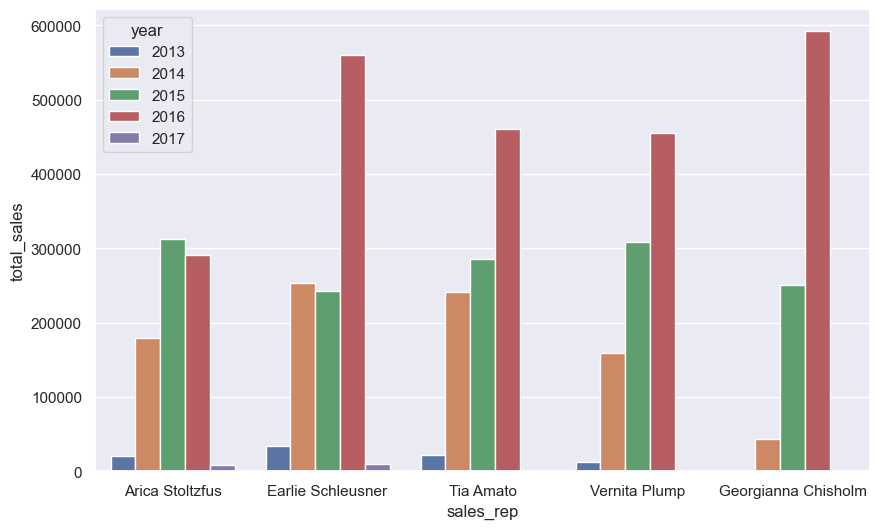

In [17]:
# plot the annual performance of the top performers
plot_bar(x='sales_rep', y='total_sales', hue='year', df=high_sales_reps_df)

- All of the top performers except for **`Arica Stoltzfus`** have shown an improvement in performance on an annual basis.
- The performance of **`Earlie Schleusner`** and **`Georgianna Chisholm`** experienced a dramatic increase of almost **`100%`** in **`2016`**.
- The top performers appear to be in close competition with one another.

***7. What is the trend in performance for the low performers?***

In [18]:
%%sql
SELECT s.name sales_rep, STRFTIME('%Y', o.occurred_at) year, ROUND(SUM(o.total_amt_usd), 2) total_sales
FROM sales_reps s
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
WHERE s.name IN ('Nakesha Renn', 'Julie Starr', 'Elba Felder', 'Kathleen Lalonde', 'Akilah Drinkard')
GROUP BY 1, 2
ORDER BY 1;

 * sqlite:///pandp.db
Done.


sales_rep,year,total_sales
Akilah Drinkard,2014,41117.38
Akilah Drinkard,2015,38109.41
Akilah Drinkard,2016,57387.2
Elba Felder,2013,1228.72
Elba Felder,2014,22893.08
Elba Felder,2015,38088.2
Elba Felder,2016,51730.02
Elba Felder,2017,1036.57
Julie Starr,2013,738.54
Julie Starr,2014,22979.77


- **Transform the query results into a Pandas dataframe**

In [19]:
# Create low sales reps df
low_sales_reps_query = %sql SELECT s.name sales_rep, STRFTIME('%Y', o.occurred_at) year, ROUND(SUM(o.total_amt_usd), 2) total_sales FROM sales_reps s JOIN accounts a ON s.id = a.sales_rep_id JOIN orders o ON a.id = o.account_id WHERE s.name IN ('Nakesha Renn', 'Julie Starr', 'Elba Felder', 'Kathleen Lalonde', 'Akilah Drinkard') GROUP BY 1, 2 ORDER BY 2 
low_sales_reps_df = low_sales_reps_query.DataFrame()

 * sqlite:///pandp.db
Done.


- **plot the annual performance of the low performers**

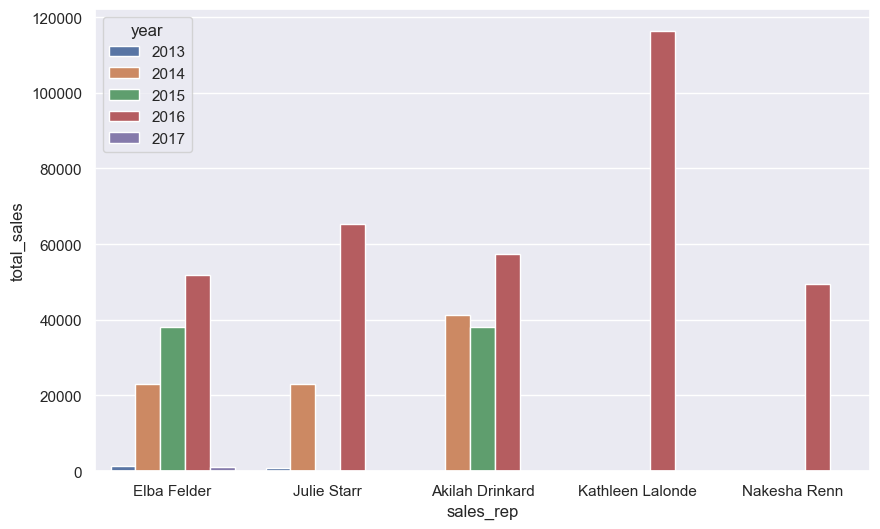

In [20]:
# plot the annual performance of the low performers
plot_bar(x='sales_rep', y='total_sales', hue='year', df=low_sales_reps_df)

- It seems that **`Kathleen`** and **`Nakesha`** only began working for the company in **`2016`**, which may explain their low sales. Therefore, **`Kathleen`** may not be considered a low performer overall, and **`Nakesha's`** performance may improve in future years as she gains more experience. 
- **`Elba`** experienced stunted growth in performance.
- It is possible that **`Julie`** did not make any sales in **`2015`** due to being on leave or absent.
- **`Akilah`** has irregular performance.

### 4.3 Customers
Customers play a vital role in the success of a business, as they provide the revenue needed to sustain and grow the company. It is important for businesses to understand the needs and preferences of their customers in order to effectively market and sell their products or services (Kotler & Keller, 2016). In this section, we will analyze P&P's customer data to understand their purchasing habits.

***8. How many customers does P&P have?***

In [21]:
%%sql
SELECT COUNT(*) number_of_customers
FROM accounts;

 * sqlite:///pandp.db
Done.


number_of_customers
351


- **`P&P`** has **`351`** customers.

***Who are the top and bottom five customers?***

- **Get the top five customers**

In [22]:
%%sql
SELECT a.name, ROUND(SUM(o.total_amt_usd), 2) total_purchase
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///pandp.db
Done.


name,total_purchase
EOG Resources,382873.3
Mosaic,345618.59
IBM,326819.48
General Dynamics,300694.79
Republic Services,293861.14


- **`P&P's`** top customers are **`EOG Resources, Mosaic, IBM, General Dynamics, and Republic Services`**, with a range of spendings close to **`300-400 thousand USD`**.

- **Get the bottom five customers**

In [23]:
%%sql
WITH cte AS (SELECT a.name, ROUND(SUM(o.total_amt_usd), 2) total_purchase
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY 1
ORDER BY 2
LIMIT 5)

SELECT *
FROM cte
ORDER BY 2 DESC;

 * sqlite:///pandp.db
Done.


name,total_purchase
Bed Bath & Beyond,1069.64
Deere,1036.57
Level 3 Communications,881.73
Delta Air Lines,859.64
Nike,390.25


- **`P&P's`** bottom customers are **`Bed Bath & Beyond, Deere, Level 3 Communications, Delta Air Lines and Nike`** each with less than **`$1,500`** in cumulative spending.

***9. What are the trends in purchasing behaviour among the top and bottom customers?***

- **Get the total annual purchases made by the top customers**

In [24]:
%%sql
SELECT  a.name, STRFTIME('%Y',  o.occurred_at) year,  ROUND(SUM(o.total_amt_usd),2) annual_purchase
FROM accounts a 
JOIN orders o
ON o.account_id = a.id
WHERE a.name IN ('G Resources', 'Mosaic', 'IBM', 'General Dynamics',  'Republic Services')
GROUP BY 1, 2;

 * sqlite:///pandp.db
Done.


name,year,annual_purchase
General Dynamics,2013,10166.07
General Dynamics,2014,88383.04
General Dynamics,2015,103768.09
General Dynamics,2016,98377.59
IBM,2013,9580.87
IBM,2014,85418.97
IBM,2015,146537.01
IBM,2016,85282.63
Mosaic,2013,8348.08
Mosaic,2014,78933.56


- **Transform the query ouput to a Pandas DataFrame**

In [25]:
top_customers_qry = %sql SELECT  a.name, STRFTIME('%Y',  o.occurred_at) year, ROUND(SUM(o.total_amt_usd),2) annual_purchase FROM accounts a JOIN orders o ON o.account_id = a.id WHERE a.name IN ('G Resources', 'Mosaic', 'IBM', 'General Dynamics',  'Republic Services') GROUP BY 1, 2;
top_customers_df = top_customers_qry.DataFrame()

 * sqlite:///pandp.db
Done.


- **Plot the annual purchases**

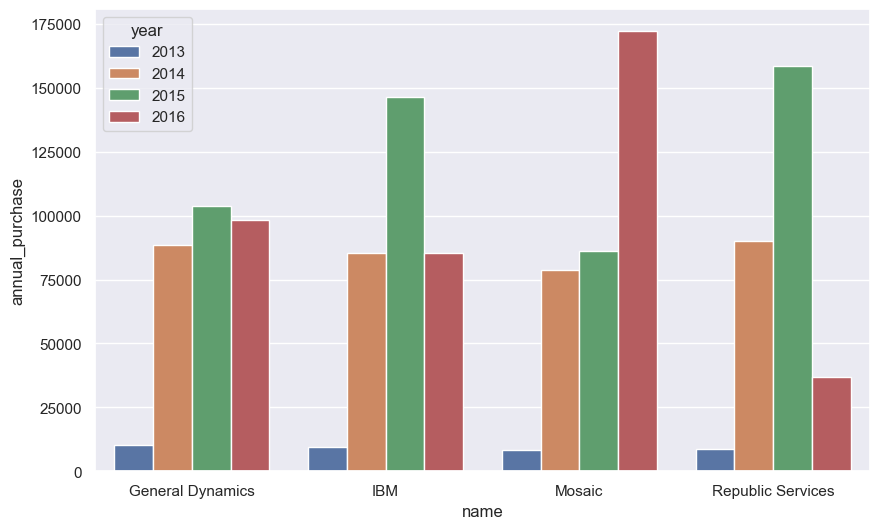

In [26]:
# Plot the annual purchases
plot_bar(x='name', y='annual_purchase', hue='year', df=top_customers_df)

- While **`2016`** was a great year for **`P&P`** in terms of sales, it is worth noting that the top 5 customers made their highest purchases in **`2015`**, except for **`Mosaic`**. It would be useful to examine the reasons behind the drop in spending by these top customers in **`2016`**.

- **Get the total annual purchases made by the bottom customers**

In [27]:
%%sql
SELECT  a.name, STRFTIME('%Y',  o.occurred_at) year,  ROUND(SUM(o.total_amt_usd),2) annual_purchase
FROM accounts a 
JOIN orders o
ON o.account_id = a.id
WHERE a.name IN ('Bed Bath & Beyond', 'Deere', 'Level 3 Communications', 'Delta Air Lines', 'Nike')
GROUP BY 1, 2;

 * sqlite:///pandp.db
Done.


name,year,annual_purchase
Bed Bath & Beyond,2013,1069.64
Deere,2017,1036.57
Delta Air Lines,2016,859.64
Level 3 Communications,2015,881.73
Nike,2016,390.25


- **Transform the query ouput to a Pandas DataFrame**

In [28]:
low_customers_qry = %sql SELECT  a.name, STRFTIME('%Y',  o.occurred_at) year, ROUND(SUM(o.total_amt_usd),2) annual_purchase FROM accounts a JOIN orders o ON o.account_id = a.id WHERE a.name IN ('Bed Bath & Beyond', 'Deere', 'Level 3 Communications', 'Delta Air Lines', 'Nike') GROUP BY 1, 2;
low_customers_df = top_customers_qry.DataFrame()

 * sqlite:///pandp.db
Done.


- **Plot the annual purchases**

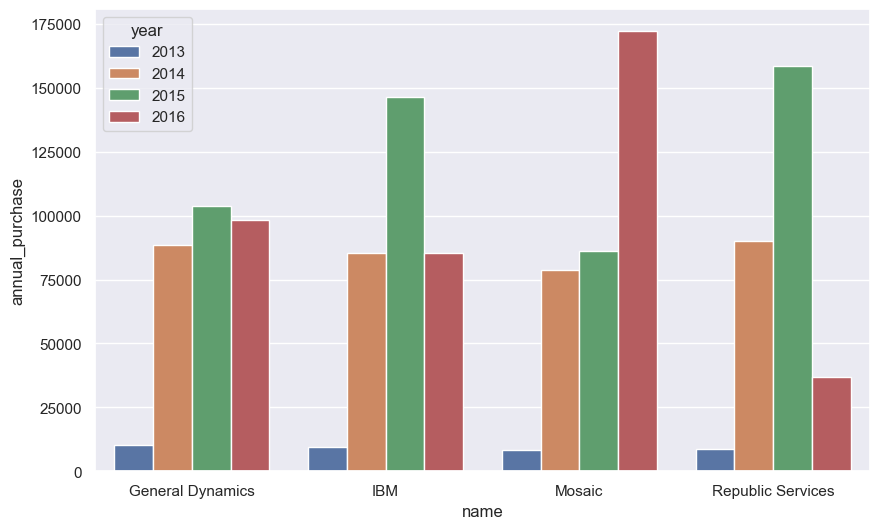

In [29]:
# Plot the annual purchases
plot_bar(x='name', y='annual_purchase', hue='year', df=top_customers_df)

- All of the bottom customers had a history of purchasing from the company for a period of one year.
- **`Bed Bath & Beyond`** and **`Level 3 Communications`** made their last purchases from the company in 2013 and 2015, respectively, and are now considered churned customers.
- **`Delta Air Lines, Nike, and Deere`** can be considered new customers because they began their transactions in 2016 and 2017, respectively. It is possible that they will make additional purchases in the future.

***10. What is the distribution of the total customers’ spending?***

- **Get the total customers' spending?**

In [30]:
%%sql
SELECT account_id, ROUND(SUM(total_amt_usd), 2) total_purchase
FROM orders
GROUP BY 1
LIMIT 5;

 * sqlite:///pandp.db
Done.


account_id,total_purchase
1001,124014.87
1011,2734.59
1021,20767.15
1031,7474.32
1041,15184.46


- **Transform the query ouput to a Pandas DataFrame**

In [31]:
customers_total_spend_qry = %sql SELECT account_id, ROUND(SUM(total_amt_usd), 2) total_spend FROM orders GROUP BY 1
customers_total_spend_df = customers_total_spend_qry.DataFrame()

 * sqlite:///pandp.db
Done.


- **Evaluate the summary statistics of the customers' spending**

In [32]:
# Evaluate the summary statistics of the customers' spending
customers_total_spend_df.describe(percentiles=[0.2, 0.4, 0.6, 0.8, 0.9])

,account_id,total_spend
count,350.000000,350.000000
mean,2753.914286,66118.605229
std,1014.672626,71299.263574
min,1001.000000,390.250000
20%,1699.000000,11450.198000
40%,2407.000000,27364.832000
50%,2756.000000,38337.055000
60%,3105.000000,54832.256000
80%,3803.000000,118938.526000
90%,4152.000000,156676.340000


- **Plot the histogram of the distribution**

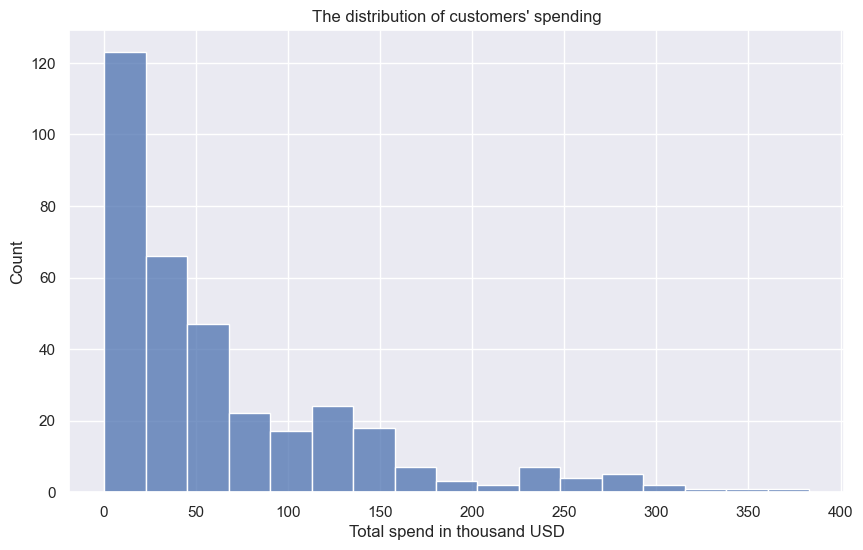

In [33]:
# Create the plot
plt.figure(figsize=(10, 6)) 

# Convert total spend to thousands
customers_total_spend_df['total_spend'] = customers_total_spend_df['total_spend']/1e3

# Create the plot
sns.histplot(data=customers_total_spend_df, x='total_spend')

plt.xlabel('Total spend in thousand USD')
plt.title("The distribution of customers' spending")

# Show the plot
plt.show()

- The distribution is right-skewed with about **`90%`** of the customers spending less than or equal to **`$150,000`**.

***11. Segmenting customers into `Bronze, Silver, Gold, and Platinum` categories: how many customers fall into each segment?***

- **Get the number of customers per category**

In [34]:
%%sql
WITH cte1 AS (
    SELECT account_id, 
           ROUND(SUM(total_amt_usd), 2) total_purchase
    FROM orders
    GROUP BY 1
),
cte2 AS (
    SELECT account_id, 
           total_purchase,
           CASE 
               WHEN total_purchase > 150000 THEN 'Platinum'
               WHEN total_purchase > 100000 AND total_purchase <= 150000 THEN 'Gold'
               WHEN total_purchase > 50000 AND total_purchase <= 100000 THEN 'Silver'
               ELSE 'Bronze' END AS segment
    FROM cte1
)
SELECT segment, COUNT(segment) count
FROM cte2
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///pandp.db
Done.


segment,count
Bronze,203
Silver,65
Gold,43
Platinum,39


- **Collect segmentation query output in a DataFrame**

In [35]:
# Collect segmentation query output in a dictionary
segements = {'segment': ['Bronze', 'Silver', 'Gold', 'Platinum'], 
             'count': [203, 65, 43, 39]}
# Create the DataFrame 
segements_df = pd.DataFrame(segements)

- **Plot the segments by count**

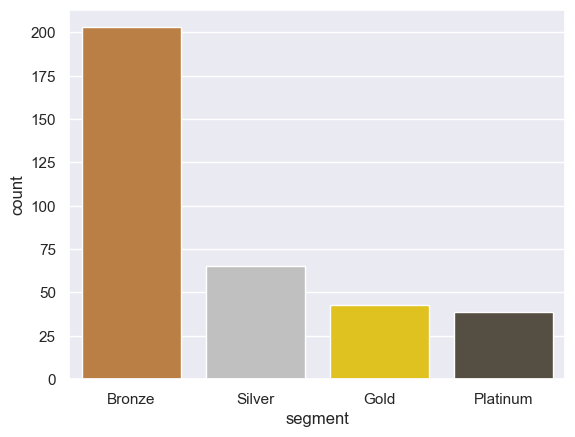

In [36]:
# Plot the segments by count
palette = ['#CD7F32', '#C0C0C0', '#FFD700', '#584F3F']
ax = sns.barplot(x='segment', y='count', data=segements_df, palette=palette)

- The majority of **`P&P's`** customers can be classified as **`bronze`**, as they have a total spending of less than **`$50,000`**.

### 4.4 Channels
Advertising channels are the means through which a company's advertising messages are delivered to target audiences. They are important for companies to consider when developing their advertising campaigns because they can impact the effectiveness and reach of the campaign. In this section we analyse the web_events table to identify the most profitable and effective channel for P&P.

***12. How many channels are in the web_events table?***

- **Count the channels**

In [37]:
%%sql
SELECT COUNT(DISTINCT channel) 'number of channels'
FROM web_events

 * sqlite:///pandp.db
Done.


number of channels
6


- **`web_events table`** has 6 channels.

***13. Which channel generated the Most profitable traffic?***

- **Get the channel**

In [38]:
%%sql
SELECT w.channel, ROUND(SUM(o.total_amt_usd/1e6), 2) total_sales_million_usd
FROM orders o
JOIN accounts a
ON o.account_id = a.id
JOIN web_events w
ON w.account_id = a.id

GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;

 * sqlite:///pandp.db
Done.


channel,total_sales_million_usd
direct,639.7


- Of all the channels, the **`direct channel`** is the most lucrative, accounting for approximately **`$640 million`** in sales.

***14. How do direct channel sales compare to that of others?***

- **Get the distribution**

In [39]:
%%sql
SELECT w.channel, ROUND(SUM(o.total_amt_usd/1e6), 2) total_sales_million_usd
FROM orders o
JOIN accounts a
ON o.account_id = a.id
JOIN web_events w
ON w.account_id = a.id

GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///pandp.db
Done.


channel,total_sales_million_usd
direct,639.7
facebook,103.03
organic,102.05
adwords,97.78
twitter,50.67
banner,48.08


- **Transform the query ouput to a Pandas DataFrame**

In [40]:
# create revenue by channel
channel = %sql SELECT w.channel, ROUND(SUM(o.total_amt_usd/1e6), 2) total_sales_million_usd FROM orders o JOIN accounts a ON o.account_id = a.id JOIN web_events w ON w.account_id = a.id WHERE o.occurred_at GROUP BY 1 ORDER BY 2 DESC;
channel_df = channel.DataFrame()

 * sqlite:///pandp.db
Done.


- **Plot the channels sales**

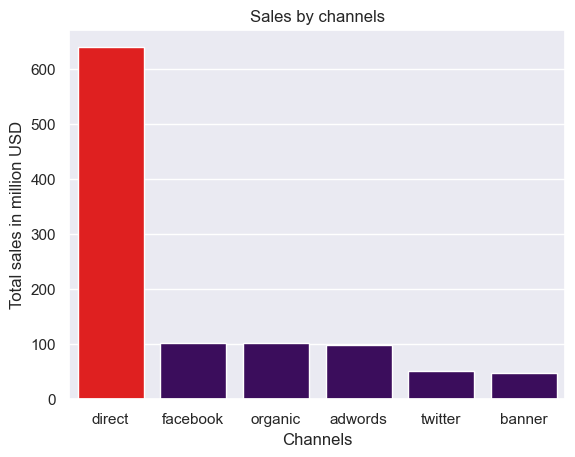

In [41]:
# Create a bar plot with the 'channel' column on the x-axis and the 'total_sales_million_usd' column on the y-axis
# Define colour palette
colour = '#3D0069'
colours = [colour for i in range(len(channel_df)-1)]
palette = ['red']
palette.extend(colours)

ax = sns.barplot(x='channel', y='total_sales_million_usd', data=channel_df, palette=palette)

# Set the x-axis label to 'Channels'
ax.set_xlabel('Channels')

# Set the y-axis label to 'Total sales in million USD'
ax.set_ylabel('Total sales in million USD')

# Set the title to 'Revenue by channel'
ax.set_title('Sales by channels');


- The **`direct channel`** recorded more sales than all the other channels combined.

### 4.5 Regions

P&P operate in various regions in the US. Let's examine these regions to know the strong hold for P&P in terms of sales.

***15. In how many regions `P&P` operates***?

In [42]:
%%sql
SELECT COUNT(DISTINCT name) 'number_of_regions'
FROM region

 * sqlite:///pandp.db
Done.


number_of_regions
4


- **`P&P`** operates in four regions.

***16. What is the relative contribution to revenue by each region?***

- **Get the revenue by region**

In [43]:
%%sql
SELECT r.name, ROUND(SUM(o.total_amt_usd), 2) total_purchase
FROM region r
JOIN sales_reps s
ON r.id = s.region_id
JOIN accounts a
ON s.id = a.sales_rep_id
JOIN orders o
ON a.id = o.account_id
GROUP BY 1
ORDER BY 2 DESC

 * sqlite:///pandp.db
Done.


name,total_purchase
Northeast,7744405.36
Southeast,6458497.0
West,5925122.96
Midwest,3013486.51


- **Collect the query ouput to a Pandas DataFrame**

In [44]:
regions = {'name': ['Northeast', 'Southeast', 'West', 'Midwest'], 
           'total_purchase': [7744405.36, 6458497.0, 5925122.96, 3013486.51]}
regions_df = pd.DataFrame(regions)

- **Plot the relative contributions**

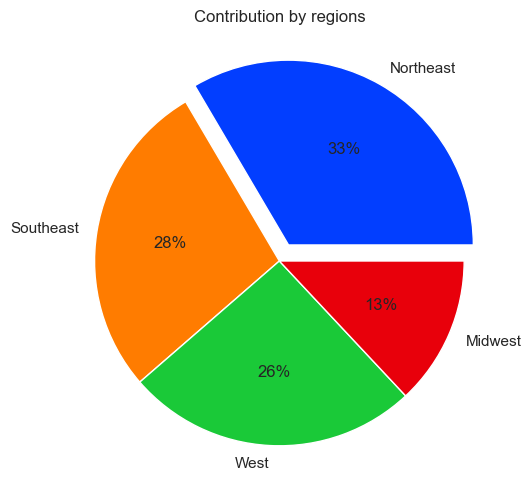

In [45]:
# Create the plot
plt.figure(figsize=(12, 6)) 

labels = regions_df['name']
values = regions_df['total_purchase']

# declaring exploding pie
explode = [0.1, 0, 0, 0] 
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Create the pie chart
plt.pie(x=values, labels=labels, colors=palette_color, explode = explode, autopct='%.0f%%')

# Add a title
plt.title('Contribution by regions')

# Show the plot
plt.show()

- The **`Northeast`** region accounts for **`33%`** of the company's total revenue, while the **`Southeast`** region accounts for **`28%`**, the **`West`** accounts for **`26%`**, and the **`Midwest`** accounts for **`13%`**.

### 4.6 Products
The products of P&P are standard, gloss, poster paper. Let's examine which of the products generates the most sales and the overall products' performance.

***17. What are the total sales by products?***

- **Get the total sales by products**

In [46]:
%%sql
SELECT ROUND(SUM(standard_amt_usd)/1e6, 2) total_standard_usd, 
ROUND(SUM(gloss_amt_usd)/1e6, 2) total_gloss_usd, 
ROUND(SUM(poster_amt_usd)/1e6, 2) total_poster_usd
FROM orders

 * sqlite:///pandp.db
Done.


total_standard_usd,total_gloss_usd,total_poster_usd
9.67,7.59,5.88


- **`Standard`** paper had total sales of **`9.67 million USD`**, **`gloss`** paper had total sales of **`7.59 million USD`**, and **`poster`** paper had total sales of **`5.88 million USD`**. The total sales of **`standard`** paper almost double that of **`poster`** paper and it differs by about **`$2 million USD`** from that of **`gloss`** paper.

***18. What is the proportional contribution of each paper type***

- **Plot the contributions**

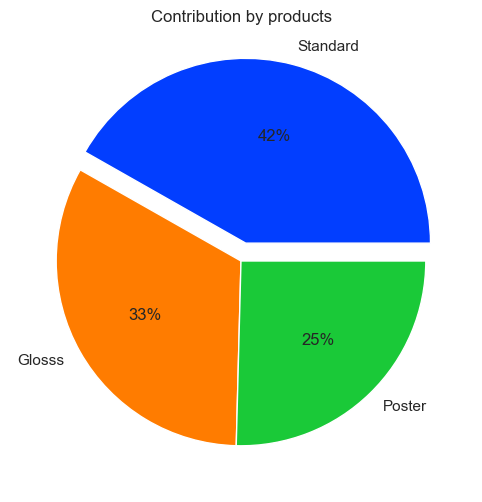

In [47]:
# Create the plot
plt.figure(figsize=(12, 6)) 

labels = ['Standard', 'Glosss', 'Poster']
values = [9.67, 7.59, 5.88]

# declaring exploding pie
explode = [0.1, 0, 0] 
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Create the pie chart
plt.pie(x=values, labels=labels, colors=palette_color, explode = explode, autopct='%.0f%%')

# Add a title
plt.title('Contribution by products')

# Show the plot
plt.show()

- **`Standard`** paper accounts for **`42%`** of total sales, **`gloss`** paper accounts for **`33%`**, and **`poster`** paper accounts for **`25%`**.

***19. What is the monthly average number of orders in year 2016***

- **Get the monthly average**

In [48]:
%%sql
WITH cte AS (SELECT STRFTIME('%m', occurred_at) month, 
        SUM(standard_qty) total_standard_qty,
        SUM(gloss_qty) total_gloss_qty,
        SUM(poster_qty) total_poster_qty
FROM orders
WHERE occurred_at BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1)

SELECT ROUND(AVG(total_standard_qty)) avg_standard_qty,
        ROUND(AVG(total_gloss_qty)) avg_gloss_qty,
        ROUND(AVG(total_poster_qty)) avg_poster_qty
FROM cte

 * sqlite:///pandp.db
Done.


avg_standard_qty,avg_gloss_qty,avg_poster_qty
89563.0,46151.0,34420.0


- The average order size of **`standard paper`** in **`2016`** is **`89 thousand`**, **`gloss`** is **`46 thousand`** and **`poster`** is **`34 thousand`**.

***20. What is the monthly minimum and maximum order size in the year 2016 for each paper type?***

- **Get the monthly maximum**

In [49]:
%%sql
WITH cte AS (SELECT STRFTIME('%m', occurred_at) month, 
        SUM(standard_qty) total_standard_qty,
        SUM(gloss_qty) total_gloss_qty,
        SUM(poster_qty) total_poster_qty
FROM orders
WHERE occurred_at BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1)

SELECT MAX(total_standard_qty) max_standard_qty,
        MAX(total_gloss_qty) max_gloss_qty,
        MAX(total_poster_qty) max_poster_qty
FROM cte

 * sqlite:///pandp.db
Done.


max_standard_qty,max_gloss_qty,max_poster_qty
123997,67667,79398


- The maximum monthly order size of **`standard paper`** in **`2016`** is **`123 thousand`** while those of **`gloss`** and **`poster`** paper are **`67 thousand`** and **`79 thousand`**, respectively.

**Get the monthly minimum**

In [50]:
%%sql
WITH cte AS (SELECT STRFTIME('%m', occurred_at) month, 
        SUM(standard_qty) total_standard_qty,
        SUM(gloss_qty) total_gloss_qty,
        SUM(poster_qty) total_poster_qty
FROM orders
WHERE occurred_at BETWEEN '2016-01-01' AND '2017-01-01'
GROUP BY 1)

SELECT MIN(total_standard_qty) min_standard_qty,
        MIN(total_gloss_qty) min_gloss_qty,
        MIN(total_poster_qty) min_poster_qty
FROM cte

 * sqlite:///pandp.db
Done.


min_standard_qty,min_gloss_qty,min_poster_qty
56022,27765,16358


- The minimum monthly order size of **`standard paper`** in **`2016`** is **`56 thousand`** while those of **`gloss`** and **`poster`** paper are **`27 thousand`** and **`16 thousand`**, respectively.

### 4.7 GROWTH
Growth is essential to the long-term survival of a business. It is important for companies to regularly assess and strategize their approach to growth in order to sustain and improve their performance over time. In this section we are going to identify growth rate of P&P to assess its survival chances.

***21. What are the annual growth rates of P&P?***

- **Get the growth rates**

In [51]:
%%sql
WITH cte AS (SELECT STRFTIME('%Y', occurred_at) year, ROUND(SUM(total_amt_usd),2) annual_amt_usd
FROM orders
GROUP BY 1
ORDER BY 1)

SELECT  year, 
        annual_amt_usd, 
        LAG(annual_amt_usd) OVER (ORDER BY year) AS lag,
        ROUND(100*(annual_amt_usd - LAG(annual_amt_usd) OVER (ORDER BY year))/LAG(annual_amt_usd) OVER (ORDER BY year), 2) AS growth_rate
FROM cte
WHERE year NOT IN ('2013', '2017')

 * sqlite:///pandp.db
Done.


year,annual_amt_usd,lag,growth_rate
2014,4069106.54,None,None
2015,5752004.94,4069106.54,41.36
2016,12864917.92,5752004.94,123.66


- The annual growth rates of **`P&P`** in **`2015`** and **`2016`** respectively are **`41.36%`** and **`123%`** respectively. This shows the company is growing astronomically.

***22. Comparing the months of 2016 to 2015, how did sales fare?***

- **Get the 2015 and 2016 monthly sales**

In [52]:
%%sql
SELECT strftime('%Y %m', occurred_at) years, strftime('%m', occurred_at) months, ROUND(SUM(total_amt_usd), 2) total_sales
FROM orders
WHERE occurred_at LIKE '2015%' OR occurred_at LIKE '2016%'
GROUP BY 1

 * sqlite:///pandp.db
Done.


years,months,total_sales
2015 01,01,347804.3
2015 02,02,333688.01
2015 03,03,519403.4
2015 04,04,451753.57
2015 05,05,390830.84
2015 06,06,420906.13
2015 07,07,461895.49
2015 08,08,463754.33
2015 09,09,510848.57
2015 10,10,554190.81


- **Transform the query ouput to a Pandas DataFrame**

In [53]:
total_sales_qry = %sql SELECT strftime('%Y %m', occurred_at) years, strftime('%m', occurred_at) months, ROUND(SUM(total_amt_usd), 2) average_sales FROM orders WHERE occurred_at LIKE '2015%' OR occurred_at LIKE '2016%' GROUP BY 1
total_sales_df = total_sales_qry.DataFrame()

 * sqlite:///pandp.db
Done.


- **Plot the month over month chart**

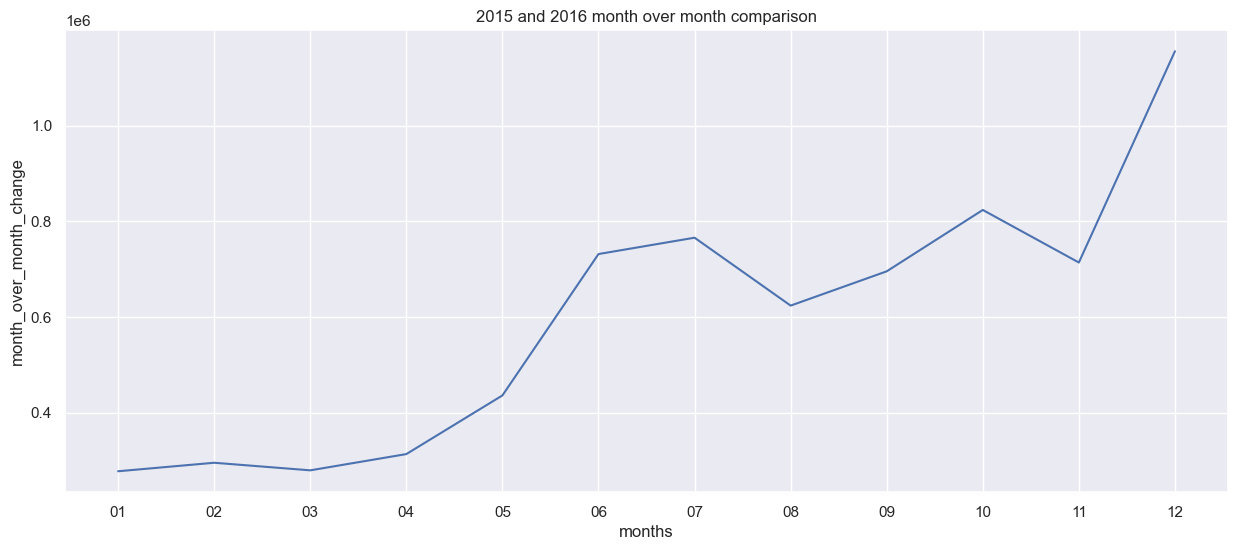

In [54]:
total_sales_df['month_over_month_change'] = total_sales_df['average_sales'] - total_sales_df['average_sales'].shift(12)
# Set the figure size to 10 inches wide and 6 inches tall

plt.figure(figsize=(15, 6))
# Create a line plot with the year on the x-axis and the YoY change on the y-axis
sns.lineplot(x='months', y='month_over_month_change', data=total_sales_df)

plt.title('2015 and 2016 month over month comparison');

- There is high variability between the two years monthly sales.
- There is no seasonal sales pattern between the two years.
- Overall 2016 sales are better than those of 2015.

<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  5. Conclusions
</h2>

- P&P has excellent employee retention strategies, which leads to cost savings on hiring expenses.
- The top-performing sales reps recorded up to or close to a million USD in total sales.
- Most of the top performers showed consistent growth, with exceptional performance in 2016.
- The top performers appear to be in close competition with one another.
- The low-performing sales reps recorded less than 150 thousand USD in total sales.
- Some of the low-performing sales reps are new employees.
- Five of the bottom customers have less than $1,500 in cumulative spending to date. Their low spending may be due to the fact that some of them are new or have churned.
- The direct channel, Northeast region, and standard paper product category generate the most revenue.
- The best year for the company was 2016, with an annual growth rate of 123%.


<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  6. Recommendations
</h2>


By offering incentives to the top performers, P&P can encourage other team members to strive for similar levels of success. Additionally, promoting top performers to mentor other team members can help to spread their knowledge and expertise, leading to improved sales performance across the organisation.
Consider conducting interviews with low-performing sales reps to uncover any challenges they may be facing.
Encourage top customers with discounts and dedicated support in order to increase customer loyalty and satisfaction.
Attempt to contact churned customers with the goal of bringing them back to the business.
Invest more in the direct channel and Northeast region, and investigate why other channels and regions are not performing as efficiently.
Utilise the minimum, maximum, average, and monthly number of orders data for each paper product in order to optimise inventory management.
Look for ways to build upon the business success of 2016 in order to drive further growth.


<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  7. References
</h2>


- Kotler, P., & Keller, K. L. (2016). Marketing management (15th ed.). Upper Saddle River, NJ: Pearson Education.
- Perreault, W. D., Cannon, J. P., & McCarthy, E. J. (2016). Basic marketing: A marketing strategy planning approach (19th ed.). McGraw-Hill Education.
- Oyon, D., & Garrido-Moreno, A. (2006). The impact of innovation on business performance: Evidence from Spanish companies. Journal of Business Research, 59(9), 1059-1066.



<footer style="background-color: #3D0069; color: white ; font-family: 'Merriweather'; font-weight: bold; text-align: center; padding: 20px 0; font-size: 16px;">
    <p style="text-align: center;"> <i>Datavestigating to connect the facts</i> </p>
    <p style="font-size: 14px; text-align: center;">&copy; The Datavestigator</p>   
</footer>